# Online Retail Store Forecasting

Now a days a small retail stores are becoming a trend, by helping this stores to predict there future sales they will have a better inventory decisions for the next day. They might also have insights on how the business will develop for the future and if there is the need to change any thing for the future.

In [1]:
# Getting imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset

The dataset used for this project is [Online Retail II](https://archive.ics.uci.edu/dataset/502/online+retail+ii) by Daqing Chen, which is in fact a real world dataset based on a small online retail store. The dataset contains data from 2009-2011 and cotains missing values. The information given by the dataset is the following:

- InvoiceNo: Invoice number. Nominal. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation. 
- StockCode: Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product. 
- Description: Product (item) name. Nominal. 
- Quantity: The quantities of each product (item) per transaction. Numeric.	
- InvoiceDate: Invice date and time. Numeric. The day and time when a transaction was generated. 
- UnitPrice: Unit price. Numeric. Product price per unit in sterling (Â£). 
- CustomerID: Customer number. Nominal. A 5-digit integral number uniquely assigned to each customer. 
- Country: Country name. Nominal. The name of the country where a customer resides.

Chen, D. (2012). Online Retail II [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C5CG6D.

# Data Exploration

For this part of the project we will initialy:

- Look at the dataset
- Find missing values
- Find anomalies
- Find patterns for anomalies and missing values

In [2]:
df = pd.read_excel('./data/online_retail_II.xlsx', sheet_name=0)
df.head(10)

Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
5  489434     22064           PINK DOUGHNUT TRINKET POT         24   
6  489434     21871                  SAVE THE PLANET MUG        24   
7  489434     21523   FANCY FONT HOME SWEET HOME DOORMAT        10   
8  489435     22350                            CAT BOWL         12   
9  489435     22349       DOG BOWL , CHASING BALL DESIGN        12   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom  
5 2009-12-01 07:45:00   1.65      13085.0  United Kingdom  
6 2009-12-01 07:45:00   1.25      13085.0  United Kingdom  
7 2009-12-01 07:45:00   5.95      13085.0  United Kingdom  
8 2009-12-01 07:46:00   2.55      13085.0  United Kingdom  
9 2009-12-01 07:46:00   3.75      13085.0  United Kingdom

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [4]:
df.isna().sum()

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

In [5]:
df.describe()

Quantity                    InvoiceDate          Price  \
count  525461.000000                         525461  525461.000000   
mean       10.337667  2010-06-28 11:37:36.845017856       4.688834   
min     -9600.000000            2009-12-01 07:45:00  -53594.360000   
25%         1.000000            2010-03-21 12:20:00       1.250000   
50%         3.000000            2010-07-06 09:51:00       2.100000   
75%        10.000000            2010-10-15 12:45:00       4.210000   
max     19152.000000            2010-12-09 20:01:00   25111.090000   
std       107.424110                            NaN     146.126914   

         Customer ID  
count  417534.000000  
mean    15360.645478  
min     12346.000000  
25%     13983.000000  
50%     15311.000000  
75%     16799.000000  
max     18287.000000  
std      1680.811316

In [6]:
df.describe(include='O')

Invoice StockCode                         Description         Country
count    525461    525461                              522533          525461
unique    28816      4632                                4681              40
top      537434    85123A  WHITE HANGING HEART T-LIGHT HOLDER  United Kingdom
freq        675      3516                                3549          485852

In [7]:
df[df["Customer ID"].isna()].head(10) 

Invoice StockCode                   Description  Quantity  \
263   489464     21733                  85123a mixed       -96   
283   489463     71477                         short      -240   
284   489467    85123A                   21733 mixed      -192   
470   489521     21646                           NaN       -50   
577   489525    85226C     BLUE PULL BACK RACING CAR         1   
578   489525     85227   SET/6 3D KIT CARDS FOR KIDS         1   
1055  489548     22271          FELTCRAFT DOLL ROSIE         1   
1056  489548     22254          FELT TOADSTOOL LARGE        12   
1057  489548     22273          FELTCRAFT DOLL MOLLY         3   
1058  489548     22195  LARGE HEART MEASURING SPOONS         1   

             InvoiceDate  Price  Customer ID         Country  
263  2009-12-01 10:52:00   0.00          NaN  United Kingdom  
283  2009-12-01 10:52:00   0.00          NaN  United Kingdom  
284  2009-12-01 10:53:00   0.00          NaN  United Kingdom  
470  2009-12-01 11:44:00   0.00          NaN  United Kingdom  
577  2009-12-01 11:49:00   0.55          NaN  United Kingdom  
578  2009-12-01 11:49:00   0.85          NaN  United Kingdom  
1055 2009-12-01 12:32:00   2.95          NaN  United Kingdom  
1056 2009-12-01 12:32:00   1.25          NaN  United Kingdom  
1057 2009-12-01 12:32:00   2.95          NaN  United Kingdom  
1058 2009-12-01 12:32:00   1.65          NaN  United Kingdom

In [8]:
df[df["Quantity"] < 0].head(10)

Invoice StockCode                        Description  Quantity  \
178  C489449     22087           PAPER BUNTING WHITE LACE       -12   
179  C489449    85206A       CREAM FELT EASTER EGG BASKET        -6   
180  C489449     21895      POTTING SHED SOW 'N' GROW SET        -4   
181  C489449     21896                 POTTING SHED TWINE        -6   
182  C489449     22083         PAPER CHAIN KIT RETRO SPOT       -12   
183  C489449     21871                SAVE THE PLANET MUG       -12   
184  C489449     84946    ANTIQUE SILVER TEA GLASS ETCHED       -12   
185  C489449    84970S  HANGING HEART ZINC T-LIGHT HOLDER       -24   
186  C489449     22090          PAPER BUNTING RETRO SPOTS       -12   
196  C489459    90200A         PURPLE SWEETHEART BRACELET        -3   

            InvoiceDate  Price  Customer ID         Country  
178 2009-12-01 10:33:00   2.95      16321.0       Australia  
179 2009-12-01 10:33:00   1.65      16321.0       Australia  
180 2009-12-01 10:33:00   4.25      16321.0       Australia  
181 2009-12-01 10:33:00   2.10      16321.0       Australia  
182 2009-12-01 10:33:00   2.95      16321.0       Australia  
183 2009-12-01 10:33:00   1.25      16321.0       Australia  
184 2009-12-01 10:33:00   1.25      16321.0       Australia  
185 2009-12-01 10:33:00   0.85      16321.0       Australia  
186 2009-12-01 10:33:00   2.95      16321.0       Australia  
196 2009-12-01 10:44:00   4.25      17592.0  United Kingdom

In [9]:
df["Invoice"] = df["Invoice"].astype("str")
df[df["Invoice"].str.match("^\\d{6}$")==False].head(10)

Invoice StockCode                        Description  Quantity  \
178  C489449     22087           PAPER BUNTING WHITE LACE       -12   
179  C489449    85206A       CREAM FELT EASTER EGG BASKET        -6   
180  C489449     21895      POTTING SHED SOW 'N' GROW SET        -4   
181  C489449     21896                 POTTING SHED TWINE        -6   
182  C489449     22083         PAPER CHAIN KIT RETRO SPOT       -12   
183  C489449     21871                SAVE THE PLANET MUG       -12   
184  C489449     84946    ANTIQUE SILVER TEA GLASS ETCHED       -12   
185  C489449    84970S  HANGING HEART ZINC T-LIGHT HOLDER       -24   
186  C489449     22090          PAPER BUNTING RETRO SPOTS       -12   
196  C489459    90200A         PURPLE SWEETHEART BRACELET        -3   

            InvoiceDate  Price  Customer ID         Country  
178 2009-12-01 10:33:00   2.95      16321.0       Australia  
179 2009-12-01 10:33:00   1.65      16321.0       Australia  
180 2009-12-01 10:33:00   4.25      16321.0       Australia  
181 2009-12-01 10:33:00   2.10      16321.0       Australia  
182 2009-12-01 10:33:00   2.95      16321.0       Australia  
183 2009-12-01 10:33:00   1.25      16321.0       Australia  
184 2009-12-01 10:33:00   1.25      16321.0       Australia  
185 2009-12-01 10:33:00   0.85      16321.0       Australia  
186 2009-12-01 10:33:00   2.95      16321.0       Australia  
196 2009-12-01 10:44:00   4.25      17592.0  United Kingdom

In [10]:
df["Invoice"].str.replace("[0-9]", "", regex=True).unique()

array(['', 'C', 'A'], dtype=object)

In [11]:
df[df["Invoice"].str.startswith("A")]

Invoice StockCode      Description  Quantity         InvoiceDate  \
179403  A506401         B  Adjust bad debt         1 2010-04-29 13:36:00   
276274  A516228         B  Adjust bad debt         1 2010-07-19 11:24:00   
403472  A528059         B  Adjust bad debt         1 2010-10-20 12:04:00   

           Price  Customer ID         Country  
179403 -53594.36          NaN  United Kingdom  
276274 -44031.79          NaN  United Kingdom  
403472 -38925.87          NaN  United Kingdom

In [12]:
df["StockCode"] = df["StockCode"].astype("str")
df[(df["StockCode"].str.match("^\\d{5}$")==False) & (df["StockCode"].str.match("^\\d{5}[a-zA-Z]+$") == False)]["StockCode"].unique()

array(['POST', 'D', 'DCGS0058', 'DCGS0068', 'DOT', 'M', 'DCGS0004',
       'DCGS0076', 'C2', 'BANK CHARGES', 'DCGS0003', 'TEST001',
       'gift_0001_80', 'DCGS0072', 'gift_0001_20', 'DCGS0044', 'TEST002',
       'gift_0001_10', 'gift_0001_50', 'DCGS0066N', 'gift_0001_30',
       'PADS', 'ADJUST', 'gift_0001_40', 'gift_0001_60', 'gift_0001_70',
       'gift_0001_90', 'DCGSSGIRL', 'DCGS0006', 'DCGS0016', 'DCGS0027',
       'DCGS0036', 'DCGS0039', 'DCGS0060', 'DCGS0056', 'DCGS0059', 'GIFT',
       'DCGSLBOY', 'm', 'DCGS0053', 'DCGS0062', 'DCGS0037', 'DCGSSBOY',
       'DCGSLGIRL', 'S', 'DCGS0069', 'DCGS0070', 'DCGS0075', 'B',
       'DCGS0041', 'ADJUST2', '47503J ', 'C3', 'SP1002', 'AMAZONFEE'],
      dtype=object)

In [13]:
df[df["StockCode"].str.contains("^DOT$")]

Invoice StockCode     Description  Quantity         InvoiceDate  \
2379    489597       DOT  DOTCOM POSTAGE         1 2009-12-01 14:28:00   
2539    489600       DOT  DOTCOM POSTAGE         1 2009-12-01 14:43:00   
2551    489601       DOT  DOTCOM POSTAGE         1 2009-12-01 14:44:00   
2571    489602       DOT  DOTCOM POSTAGE         1 2009-12-01 14:45:00   
2619    489603       DOT  DOTCOM POSTAGE         1 2009-12-01 14:46:00   
...        ...       ...             ...       ...                 ...   
524272  538071       DOT  DOTCOM POSTAGE         1 2010-12-09 14:09:00   
524887  538148       DOT  DOTCOM POSTAGE         1 2010-12-09 16:26:00   
525000  538149       DOT  DOTCOM POSTAGE         1 2010-12-09 16:27:00   
525126  538153       DOT  DOTCOM POSTAGE         1 2010-12-09 16:31:00   
525147  538154       DOT  DOTCOM POSTAGE         1 2010-12-09 16:35:00   

         Price  Customer ID         Country  
2379    647.19          NaN  United Kingdom  
2539     55.96          NaN  United Kingdom  
2551     68.39          NaN  United Kingdom  
2571     59.35          NaN  United Kingdom  
2619     42.39          NaN  United Kingdom  
...        ...          ...             ...  
524272  885.94          NaN  United Kingdom  
524887  547.32          NaN  United Kingdom  
525000  620.68          NaN  United Kingdom  
525126  822.94          NaN  United Kingdom  
525147   85.79          NaN  United Kingdom  

[736 rows x 8 columns]

# Notes
## Stock Code
* StockCode is meant to follow the pattern `[0-9]{5}` but seems to have legit values for `[0-9]{5}[a-zA-Z]+`

    * Also contains other values:
    
        | **Code**            | **Description**                                                        | **Action**              |
        |---------------------|------------------------------------------------------------------------|-------------------------|
        | DCGS            | Looks valid, some quantities are negative though and customer ID is null | Exclude from clustering |
        | D               | Looks valid, represents discount values                                | Exclude from clustering |
        | DOT             | Looks valid, represents postage charges                                | Exclude from clustering |
        | M or m          | Looks valid, represents manual transactions                            | Exclude from clustering |
        | C2              | Carriage transaction - not sure what this means                        | Exclude from clustering |
        | C3              | Not sure, only 1 transaction                                           | Exclude                 |
        | BANK CHARGES or B | Bank charges                                                        | Exclude from clustering |
        | S               | Samples sent to customer                                               | Exclude from clustering |
        | TESTXXX         | Testing data, not valid                                                | Exclude from clustering |
        | gift__XXX       | Purchases with gift cards, might be interesting for another analysis, but no customer data | Exclude |
        | PADS            | Looks like a legit stock code for padding                              | Include                 |
        | SP1002          | Looks like a special request item, only 2 transactions, 3 look legit, 1 has 0 pricing | Exclude for now|
        | AMAZONFEE       | Looks like fees for Amazon shipping or something                       | Exclude for now         |
        | ADJUSTX         | Looks like manual account adjustments by admins                        | Exclude for now         |

## Data Cleaning

In [14]:
df_cleaned = df.copy()

In [15]:
df["Invoice"] = df["Invoice"].astype("str")

mask = (
    df_cleaned["Invoice"].str.match("^\\d{6}$") == True
)

df_cleaned = df_cleaned[mask]

df_cleaned.head(10)

Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
5  489434     22064           PINK DOUGHNUT TRINKET POT         24   
6  489434     21871                  SAVE THE PLANET MUG        24   
7  489434     21523   FANCY FONT HOME SWEET HOME DOORMAT        10   
8  489435     22350                            CAT BOWL         12   
9  489435     22349       DOG BOWL , CHASING BALL DESIGN        12   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom  
5 2009-12-01 07:45:00   1.65      13085.0  United Kingdom  
6 2009-12-01 07:45:00   1.25      13085.0  United Kingdom  
7 2009-12-01 07:45:00   5.95      13085.0  United Kingdom  
8 2009-12-01 07:46:00   2.55      13085.0  United Kingdom  
9 2009-12-01 07:46:00   3.75      13085.0  United Kingdom

In [16]:
df["StockCode"] = df["StockCode"].astype("str")

mask = (
    (df_cleaned["StockCode"].str.match("^\\d{5}$") == True) |
    (df_cleaned["StockCode"].str.match("^\\d{5}[a-zA-Z]+$") == True) |
    (df_cleaned["StockCode"].str.contains("^PADS$") == True)
)

df_cleaned = df_cleaned[mask]

df_cleaned.head(10)

Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
5  489434     22064           PINK DOUGHNUT TRINKET POT         24   
6  489434     21871                  SAVE THE PLANET MUG        24   
7  489434     21523   FANCY FONT HOME SWEET HOME DOORMAT        10   
8  489435     22350                            CAT BOWL         12   
9  489435     22349       DOG BOWL , CHASING BALL DESIGN        12   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom  
5 2009-12-01 07:45:00   1.65      13085.0  United Kingdom  
6 2009-12-01 07:45:00   1.25      13085.0  United Kingdom  
7 2009-12-01 07:45:00   5.95      13085.0  United Kingdom  
8 2009-12-01 07:46:00   2.55      13085.0  United Kingdom  
9 2009-12-01 07:46:00   3.75      13085.0  United Kingdom

In [17]:
df_cleaned.dropna(subset=["Customer ID"], inplace=True)

In [18]:
df_cleaned.describe()

Quantity                    InvoiceDate          Price  \
count  406337.000000                         406337  406337.000000   
mean       13.619099  2010-07-01 10:11:06.543288320       2.991462   
min         1.000000            2009-12-01 07:45:00       0.000000   
25%         2.000000            2010-03-26 14:01:00       1.250000   
50%         5.000000            2010-07-09 15:48:00       1.950000   
75%        12.000000            2010-10-14 17:09:00       3.750000   
max     19152.000000            2010-12-09 20:01:00     295.000000   
std        97.000659                            NaN       4.285876   

         Customer ID  
count  406337.000000  
mean    15373.632992  
min     12346.000000  
25%     14004.000000  
50%     15326.000000  
75%     16814.000000  
max     18287.000000  
std      1677.365907

In [19]:
df_cleaned[df["Price"] == 0]

/var/folders/fc/p3nd1byj5px7s1tkb_qphzhm0000gn/T/ipykernel_43675/3530863319.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_cleaned[df["Price"] == 0]


Invoice StockCode                        Description  Quantity  \
4674    489825     22076                 6 RIBBONS EMPIRE          12   
6781    489998     48185                DOOR MAT FAIRY CAKE         2   
18738   490961     22065     CHRISTMAS PUDDING TRINKET POT          1   
18739   490961     22142       CHRISTMAS CRAFT WHITE FAIRY         12   
32916   492079     85042          ANTIQUE LILY FAIRY LIGHTS         8   
40101   492760     21143    ANTIQUE GLASS HEART DECORATION         12   
47126   493761     79320                    FLAMINGO LIGHTS        24   
48342   493899     22355        CHARLOTTE BAG , SUKI DESIGN        10   
57619   494607     21533          RETRO SPOT LARGE MILK JUG        12   
111348  500073     21662         VINTAGE GLASS COFFEE CADDY         1   
149201  503585     22459       CAST IRON HOOK GARDEN TROWEL         8   
149202  503585     22458         CAST IRON HOOK GARDEN FORK         8   
166143  505083     22376  AIRLINE BAG VINTAGE JET SET WHITE         1   
232526  511902     21765            HANGING METAL BIRD BATH         1   
240455  512609     20914   SET/5 RED SPOTTY LID GLASS BOWLS         2   
248583  513416     22423           REGENCY CAKESTAND 3 TIER         5   
276858  516304     22690      DOORMAT HOME SWEET HOME BLUE          6   
296375  518231     22472          TV DINNER TRAY DOLLY GIRL         9   
327801  521375     22202            MILK PAN PINK RETROSPOT         3   
358820  524181    46000M       POLYESTER FILLER PAD 45x45cm       648   
364333  524701     22218              CAKE STAND LACE WHITE         2   
392008  527084     22630               DOLLY GIRL LUNCH BOX        64   
400047  527696     22121         NOEL WOODEN BLOCK LETTERS          1   
439309  531361     21843           RED RETROSPOT CAKE STAND         2   
453705  532470     22624               IVORY KITCHEN SCALES         2   
471775  533822     22846         BREAD BIN DINER STYLE RED          1   
471776  533822     22845   VINTAGE CREAM CAT FOOD CONTAINER         1   
512240  537197     22841       ROUND CAKE TIN VINTAGE GREEN         1   

               InvoiceDate  Price  Customer ID         Country  
4674   2009-12-02 13:34:00    0.0      16126.0  United Kingdom  
6781   2009-12-03 11:19:00    0.0      15658.0  United Kingdom  
18738  2009-12-08 15:25:00    0.0      14108.0  United Kingdom  
18739  2009-12-08 15:25:00    0.0      14108.0  United Kingdom  
32916  2009-12-15 13:49:00    0.0      15070.0  United Kingdom  
40101  2009-12-18 14:22:00    0.0      18071.0  United Kingdom  
47126  2010-01-06 14:54:00    0.0      14258.0  United Kingdom  
48342  2010-01-08 10:43:00    0.0      12417.0         Belgium  
57619  2010-01-15 12:43:00    0.0      16858.0  United Kingdom  
111348 2010-03-04 11:44:00    0.0      13047.0  United Kingdom  
149201 2010-04-01 17:13:00    0.0      13047.0  United Kingdom  
149202 2010-04-01 17:13:00    0.0      13047.0  United Kingdom  
166143 2010-04-20 09:56:00    0.0      12623.0         Germany  
232526 2010-06-11 11:12:00    0.0      12748.0  United Kingdom  
240455 2010-06-17 10:12:00    0.0      14045.0  United Kingdom  
248583 2010-06-24 12:34:00    0.0      13089.0  United Kingdom  
276858 2010-07-19 13:13:00    0.0      14025.0  United Kingdom  
296375 2010-08-05 15:28:00    0.0      12471.0         Germany  
327801 2010-09-05 11:58:00    0.0      12647.0         Germany  
358820 2010-09-27 16:59:00    0.0      17450.0  United Kingdom  
364333 2010-09-30 12:19:00    0.0      17667.0  United Kingdom  
392008 2010-10-14 15:33:00    0.0      14646.0     Netherlands  
400047 2010-10-18 15:13:00    0.0      13554.0  United Kingdom  
439309 2010-11-07 14:26:00    0.0      12820.0  United Kingdom  
453705 2010-11-12 11:41:00    0.0      12647.0         Germany  
471775 2010-11-19 09:40:00    0.0      12647.0         Germany  
471776 2010-11-19 09:40:00    0.0      12647.0         Germany  
512240 2010-12-05 14:02:00    0.0      12647.0         Germany

In [20]:
df_cleaned = df_cleaned[df_cleaned["Price"] > 0]

In [21]:
df_cleaned.describe()

Quantity                    InvoiceDate          Price  \
count  406309.000000                         406309  406309.000000   
mean       13.617924  2010-07-01 10:14:25.869572352       2.991668   
min         1.000000            2009-12-01 07:45:00       0.001000   
25%         2.000000            2010-03-26 14:01:00       1.250000   
50%         5.000000            2010-07-09 15:48:00       1.950000   
75%        12.000000            2010-10-14 17:09:00       3.750000   
max     19152.000000            2010-12-09 20:01:00     295.000000   
std        96.998833                            NaN       4.285951   

         Customer ID  
count  406309.000000  
mean    15373.722268  
min     12346.000000  
25%     14006.000000  
50%     15326.000000  
75%     16814.000000  
max     18287.000000  
std      1677.329470

In [22]:
len(df_cleaned)/len(df) * 100

77.32429238325965

In [23]:
df_cleaned.to_csv("./data/online_retail_II_cleaned.csv", index=False)

# Data Engineering

For this case we need to visualize and explore the dataset for forecasting with an ARIMA model. In this order we will need to visualize the data to see the amount of sales that the store made per day. In this order we will need to:

- Preprocess Invoice Date
- Visualize data
- Add new indicators for predicting
- Find correlations with the indicators

In [24]:
# Load data
df = pd.read_csv('./data/online_retail_II_cleaned.csv')

In [25]:
# Create day_revenue by grouping and summing the revenue per day
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Revenue'] = df['Quantity'] * df['Price']
day_revenue = df.groupby(df['InvoiceDate'].dt.date)['Revenue'].sum()

In [26]:
day_revenue.head(10)

InvoiceDate
2009-12-01    43543.69
2009-12-02    52887.99
2009-12-03    67429.08
2009-12-04    33771.35
2009-12-05     9803.05
2009-12-06    24442.72
2009-12-07    32753.63
2009-12-08    44583.69
2009-12-09    30861.60
2009-12-10    37543.34
Name: Revenue, dtype: float64

In [27]:
# Ensure the data is numeric
day_revenue = pd.to_numeric(day_revenue, errors='coerce')

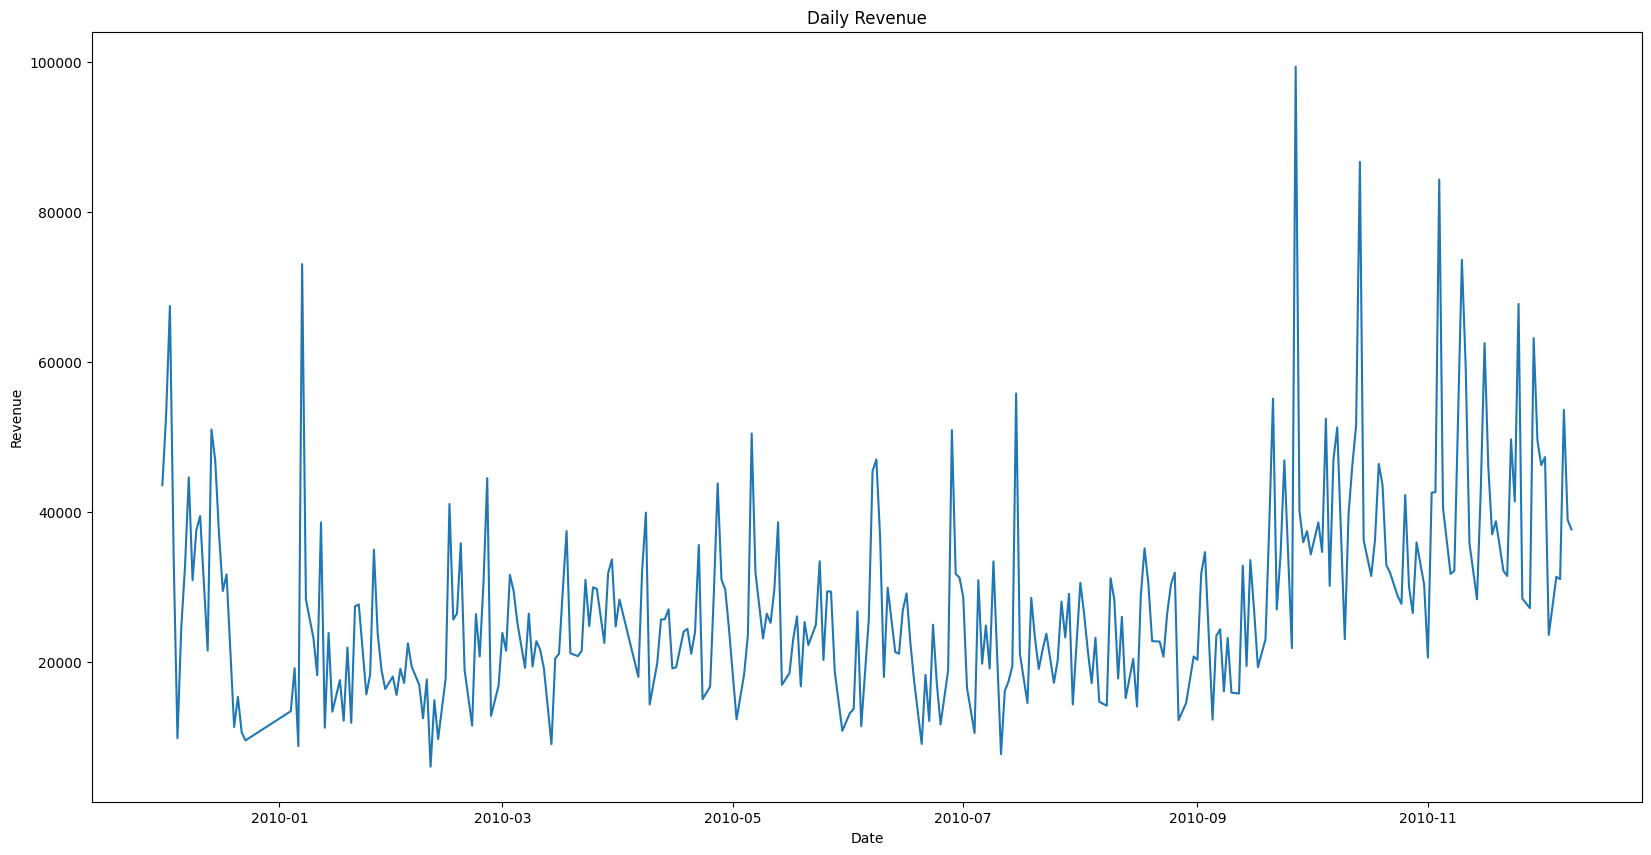

In [28]:
# Visualizing daily revenue
plt.figure(figsize=(20, 10))
sns.lineplot(x=day_revenue.index, y=day_revenue.values)
plt.title("Daily Revenue")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.show()

## Detecting Outliers

For this part of the project we will proceed to detect all the possible outliers and mark them as outliers since they can be useful since they can indicate trends or seasonality. For this aproach we will use the Interquartile Range aproach to indentify outliers.

In [29]:
# Detect outliers using the IQR method
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)  # First quartile (25th percentile)
    Q3 = df[column].quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Identify outliers
    df['Outlier'] = (df[column] < lower_bound) | (df[column] > upper_bound)
    return lower_bound, upper_bound

In [30]:
df_revenue = {'Date': day_revenue.index, 'Revenue': day_revenue.values}
df_revenue = pd.DataFrame(df_revenue)
lower_bound, upper_bound = detect_outliers_iqr(df_revenue, 'Revenue')
df_revenue[df_revenue['Outlier']]

Date   Revenue  Outlier
2    2009-12-03  67429.08     True
24   2010-01-07  73016.23     True
181  2010-07-15  55766.63     True
243  2010-09-27  99328.37     True
258  2010-10-14  86644.60     True
276  2010-11-04  84275.83     True
281  2010-11-10  73581.15     True
282  2010-11-11  59433.23     True
286  2010-11-16  62481.19     True
294  2010-11-25  67696.70     True
297  2010-11-29  63153.48     True

## Preprocess Data

For this we will add:

- Date Features
- Rolling feature for moving average
- Lag Features
- Differencing feature, to make the seasons stationary

All this proccess we will handled by the class Feature Engineer.

In [31]:
from feature_engineering import FeatureEngineer

fe = FeatureEngineer(df=df_revenue, date_col="Date", target_col="Revenue")
df_revenue_ = fe.preprocess()
df_revenue_.head(10)

Date-based features added.
Rolling features with window 7 added.
Lag features for lags [1, 7, 30] added.
Differencing with period 1 added.
Preprocessing complete.


Date   Revenue  Outlier  DayOfWeek  Month  Year  IsWeekend  \
0 2009-12-01  43543.69    False          1     12  2009          0   
1 2009-12-02  52887.99    False          2     12  2009          0   
2 2009-12-03  67429.08     True          3     12  2009          0   
3 2009-12-04  33771.35    False          4     12  2009          0   
4 2009-12-05   9803.05    False          5     12  2009          1   
5 2009-12-06  24442.72    False          6     12  2009          1   
6 2009-12-07  32753.63    False          0     12  2009          0   
7 2009-12-08  44583.69    False          1     12  2009          0   
8 2009-12-09  30861.60    False          2     12  2009          0   
9 2009-12-10  37543.34    False          3     12  2009          0   

   Revenue_RollingMean_7  Revenue_RollingStd_7  Revenue_Lag_1  Revenue_Lag_7  \
0                    NaN                   NaN            NaN            NaN   
1                    NaN                   NaN       43543.69            NaN   
2                    NaN                   NaN       52887.99            NaN   
3                    NaN                   NaN       67429.08            NaN   
4                    NaN                   NaN       33771.35            NaN   
5                    NaN                   NaN        9803.05            NaN   
6           37804.501429          18896.479682       24442.72            NaN   
7           37953.072857          18953.127552       32753.63       43543.69   
8           34806.445714          17857.093197       44583.69       52887.99   
9           30537.054286          11022.061703       30861.60       67429.08   

   Revenue_Lag_30  Revenue_Diff_1  
0             NaN             NaN  
1             NaN         9344.30  
2             NaN        14541.09  
3             NaN       -33657.73  
4             NaN       -23968.30  
5             NaN        14639.67  
6             NaN         8310.91  
7             NaN        11830.06  
8             NaN       -13722.09  
9             NaN         6681.74

## Handleling Missing Data

For this process we will use the simple imputer class to fill all the missing values from the preprocessing class.

In [32]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

In [33]:
df_revenue_filled = imputer.fit_transform(df_revenue_[["Revenue_RollingMean_7",	"Revenue_RollingStd_7",	"Revenue_Lag_1", "Revenue_Lag_7", "Revenue_Lag_30",	"Revenue_Diff_1"]])
df_revenue_[["Revenue_RollingMean_7",	"Revenue_RollingStd_7",	"Revenue_Lag_1", "Revenue_Lag_7", "Revenue_Lag_30",	"Revenue_Diff_1"]] = df_revenue_filled
df_revenue_.head(10)

Date   Revenue  Outlier  DayOfWeek  Month  Year  IsWeekend  \
0 2009-12-01  43543.69    False          1     12  2009          0   
1 2009-12-02  52887.99    False          2     12  2009          0   
2 2009-12-03  67429.08     True          3     12  2009          0   
3 2009-12-04  33771.35    False          4     12  2009          0   
4 2009-12-05   9803.05    False          5     12  2009          1   
5 2009-12-06  24442.72    False          6     12  2009          1   
6 2009-12-07  32753.63    False          0     12  2009          0   
7 2009-12-08  44583.69    False          1     12  2009          0   
8 2009-12-09  30861.60    False          2     12  2009          0   
9 2009-12-10  37543.34    False          3     12  2009          0   

   Revenue_RollingMean_7  Revenue_RollingStd_7  Revenue_Lag_1  Revenue_Lag_7  \
0           27982.447683           9776.592086   28221.387072    28033.59628   
1           27982.447683           9776.592086   43543.690000    28033.59628   
2           27982.447683           9776.592086   52887.990000    28033.59628   
3           27982.447683           9776.592086   67429.080000    28033.59628   
4           27982.447683           9776.592086   33771.350000    28033.59628   
5           27982.447683           9776.592086    9803.050000    28033.59628   
6           37804.501429          18896.479682   24442.720000    28033.59628   
7           37953.072857          18953.127552   32753.630000    43543.69000   
8           34806.445714          17857.093197   44583.690000    52887.99000   
9           30537.054286          11022.061703   30861.600000    67429.08000   

   Revenue_Lag_30  Revenue_Diff_1  
0    26685.858996      -19.296699  
1    26685.858996     9344.300000  
2    26685.858996    14541.090000  
3    26685.858996   -33657.730000  
4    26685.858996   -23968.300000  
5    26685.858996    14639.670000  
6    26685.858996     8310.910000  
7    26685.858996    11830.060000  
8    26685.858996   -13722.090000  
9    26685.858996     6681.740000

# Exploratory Data Analysis

For this part we will visualize and find the most correlated values for ARIMA model for perfect training.

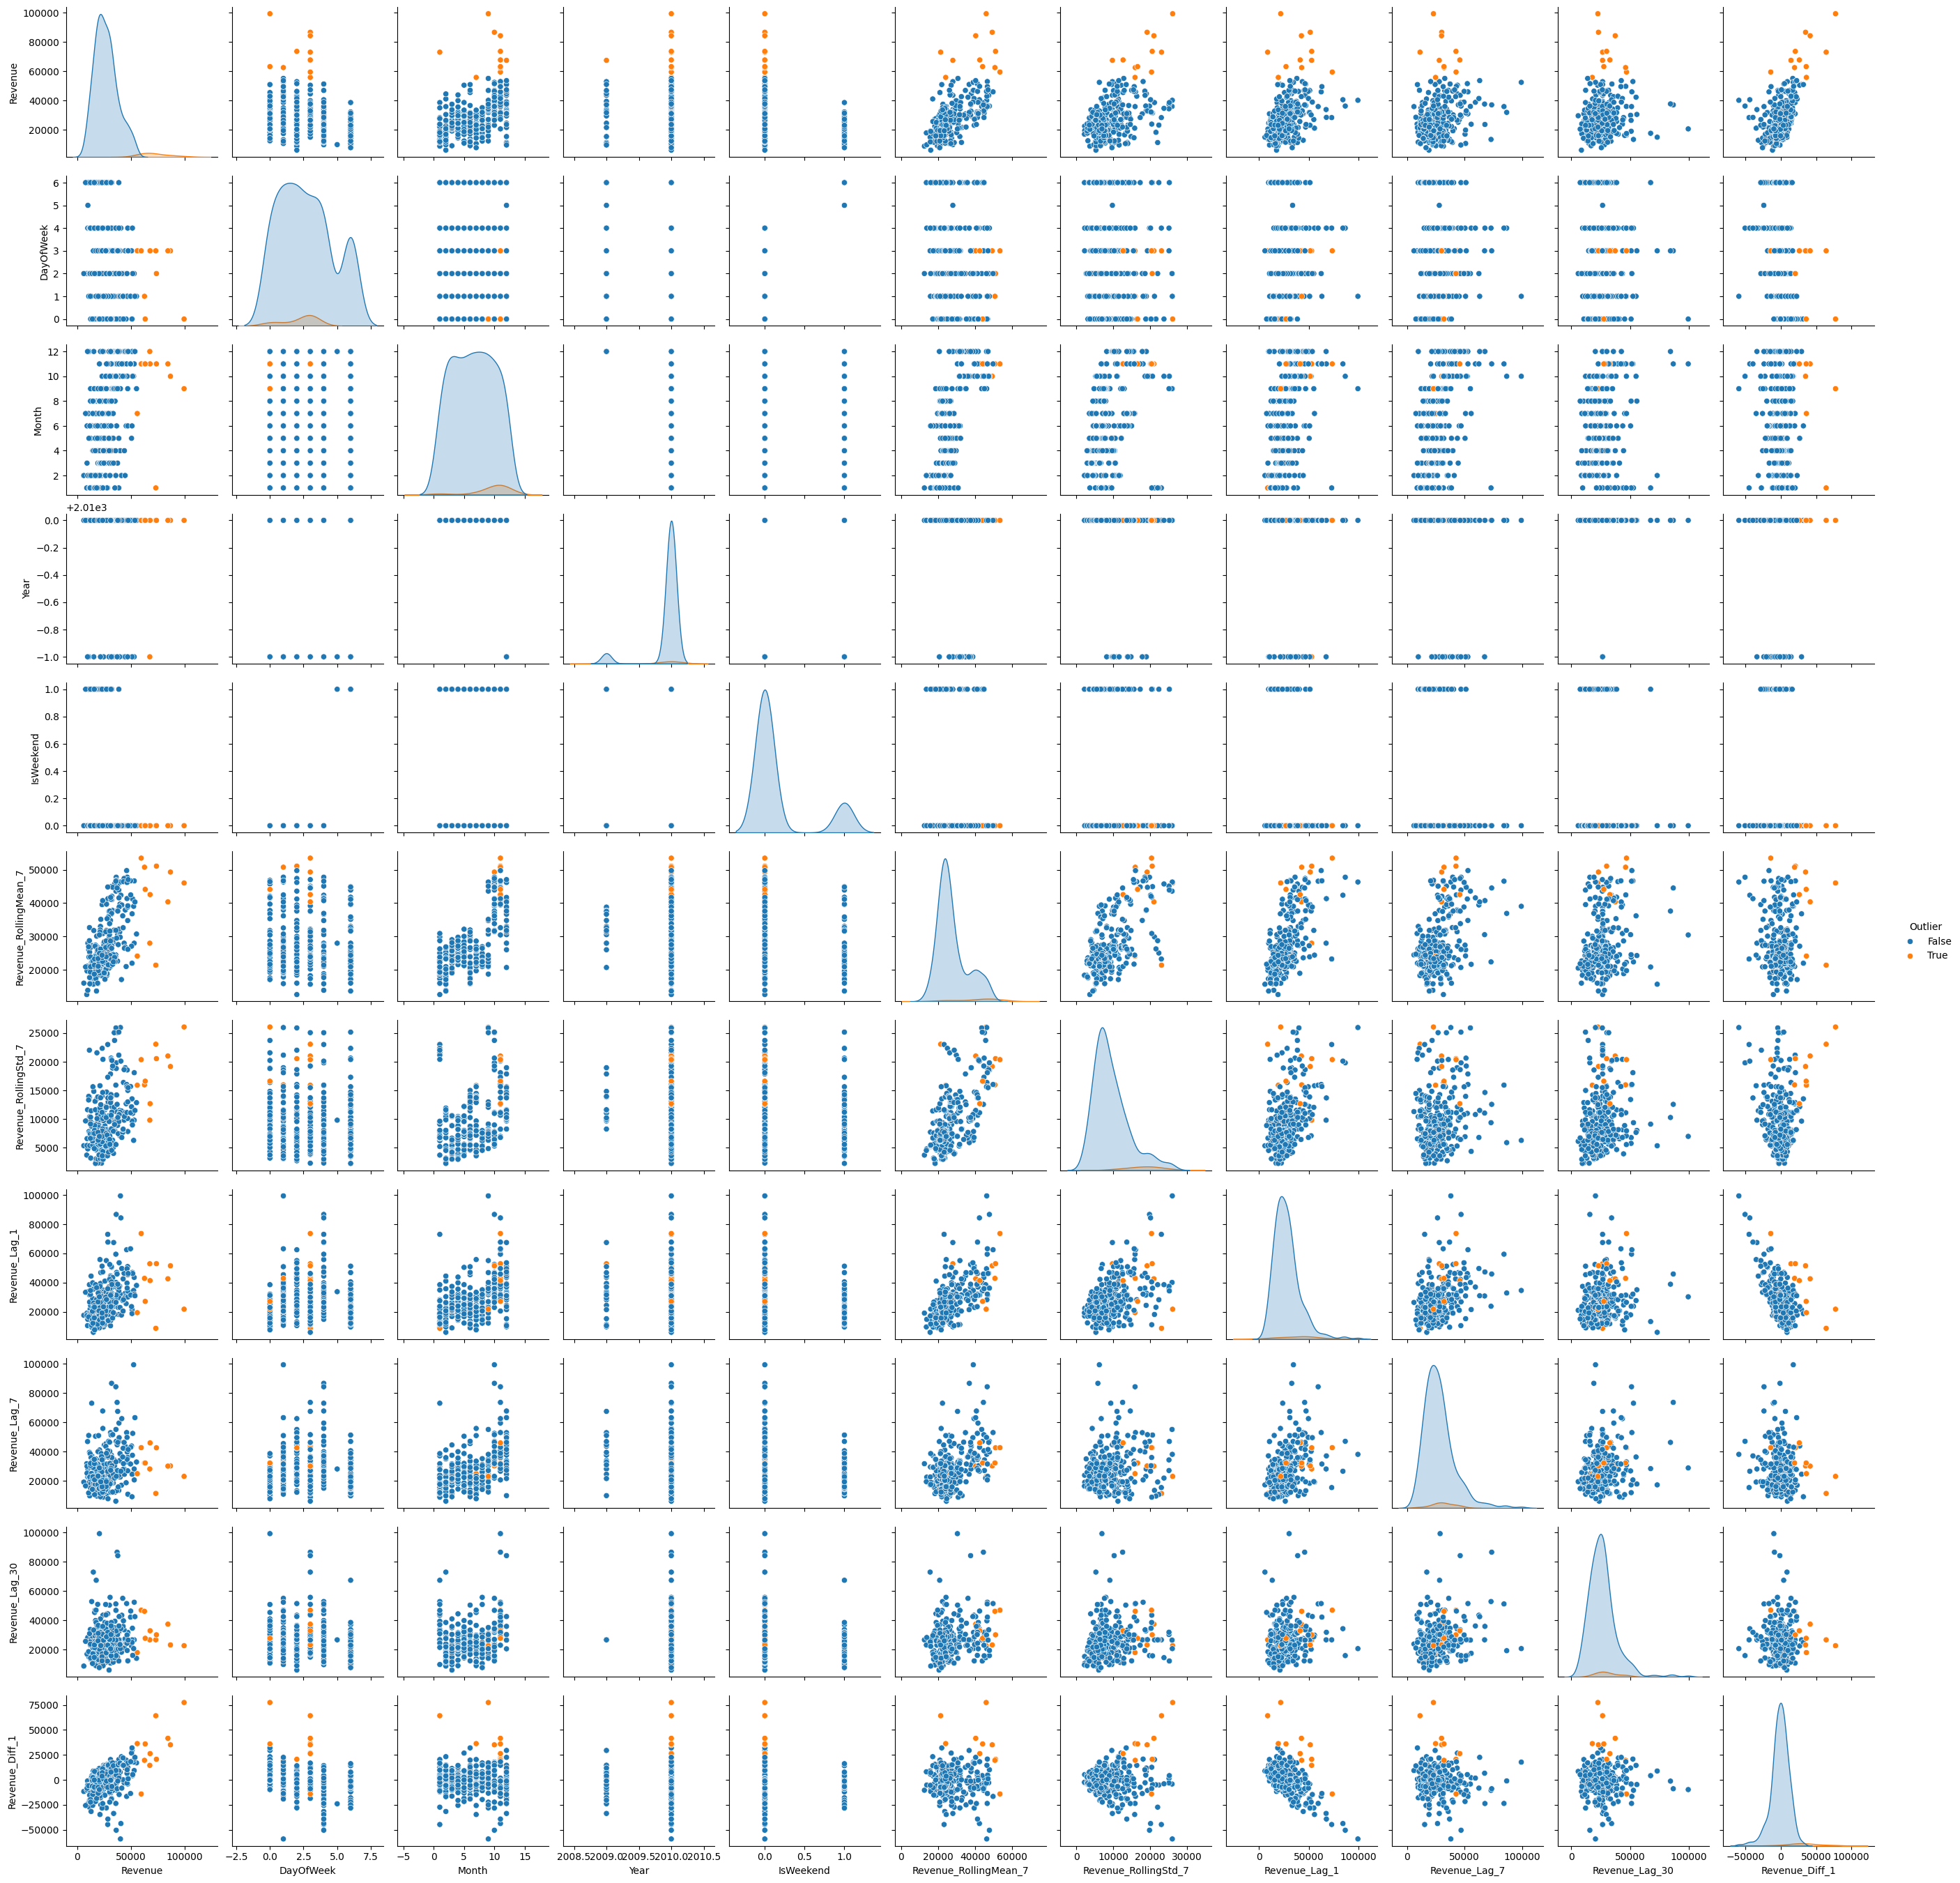

In [34]:
sns.pairplot(df_revenue_, hue='Outlier')
plt.show()

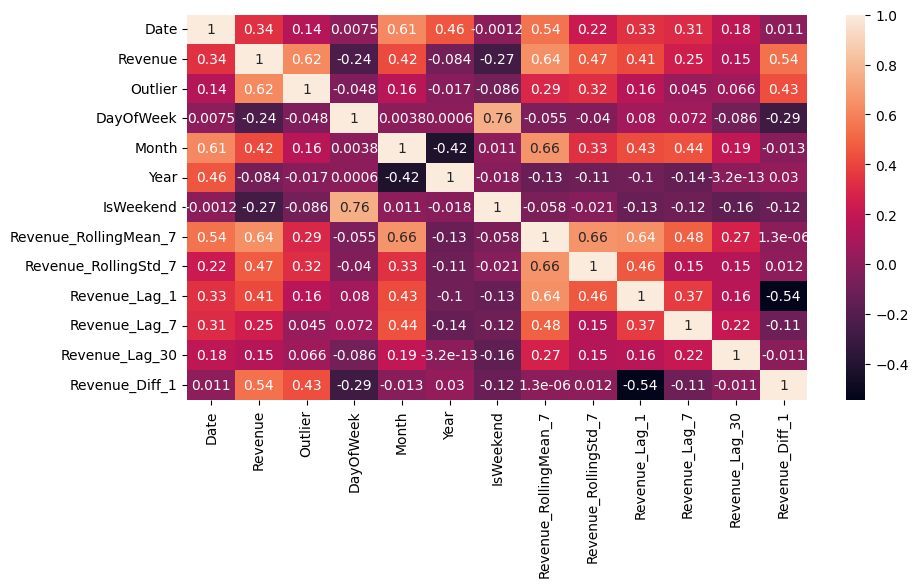

In [35]:
plt.figure(figsize=(10, 5))
sns.heatmap(df_revenue_.corr(), annot=True)
plt.show()

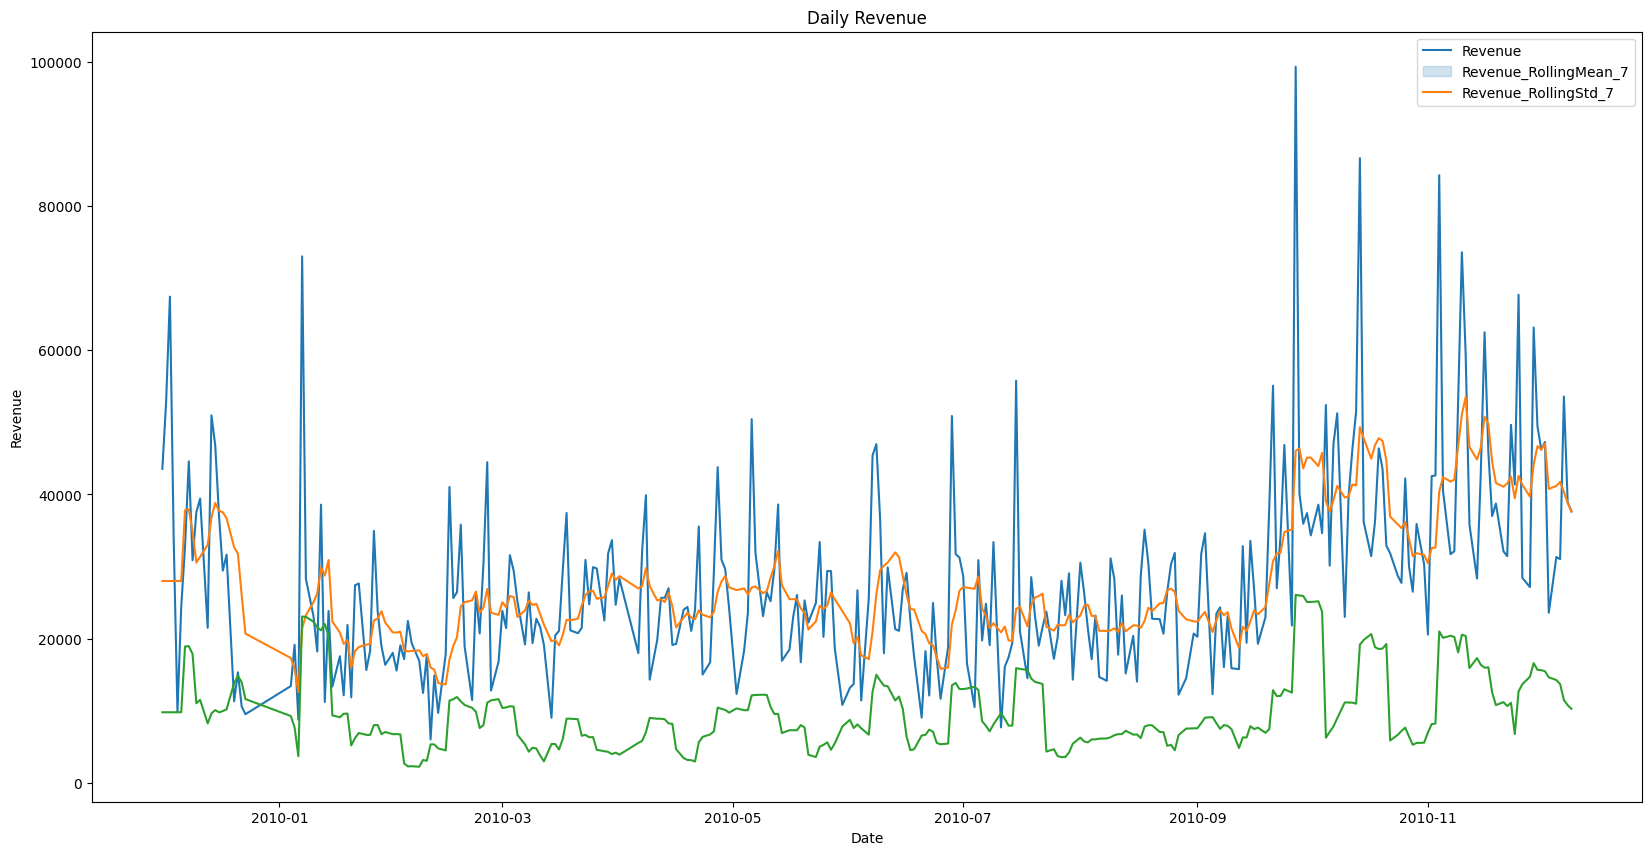

In [36]:
plt.figure(figsize=(20, 10))
sns.lineplot(x=df_revenue_['Date'], y=df_revenue_['Revenue'])
sns.lineplot(x=df_revenue_['Date'], y=df_revenue_['Revenue_RollingMean_7'])
sns.lineplot(x=df_revenue_['Date'], y=df_revenue_['Revenue_RollingStd_7'])
plt.legend(['Revenue', 'Revenue_RollingMean_7', 'Revenue_RollingStd_7'])
plt.title("Daily Revenue")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.show()

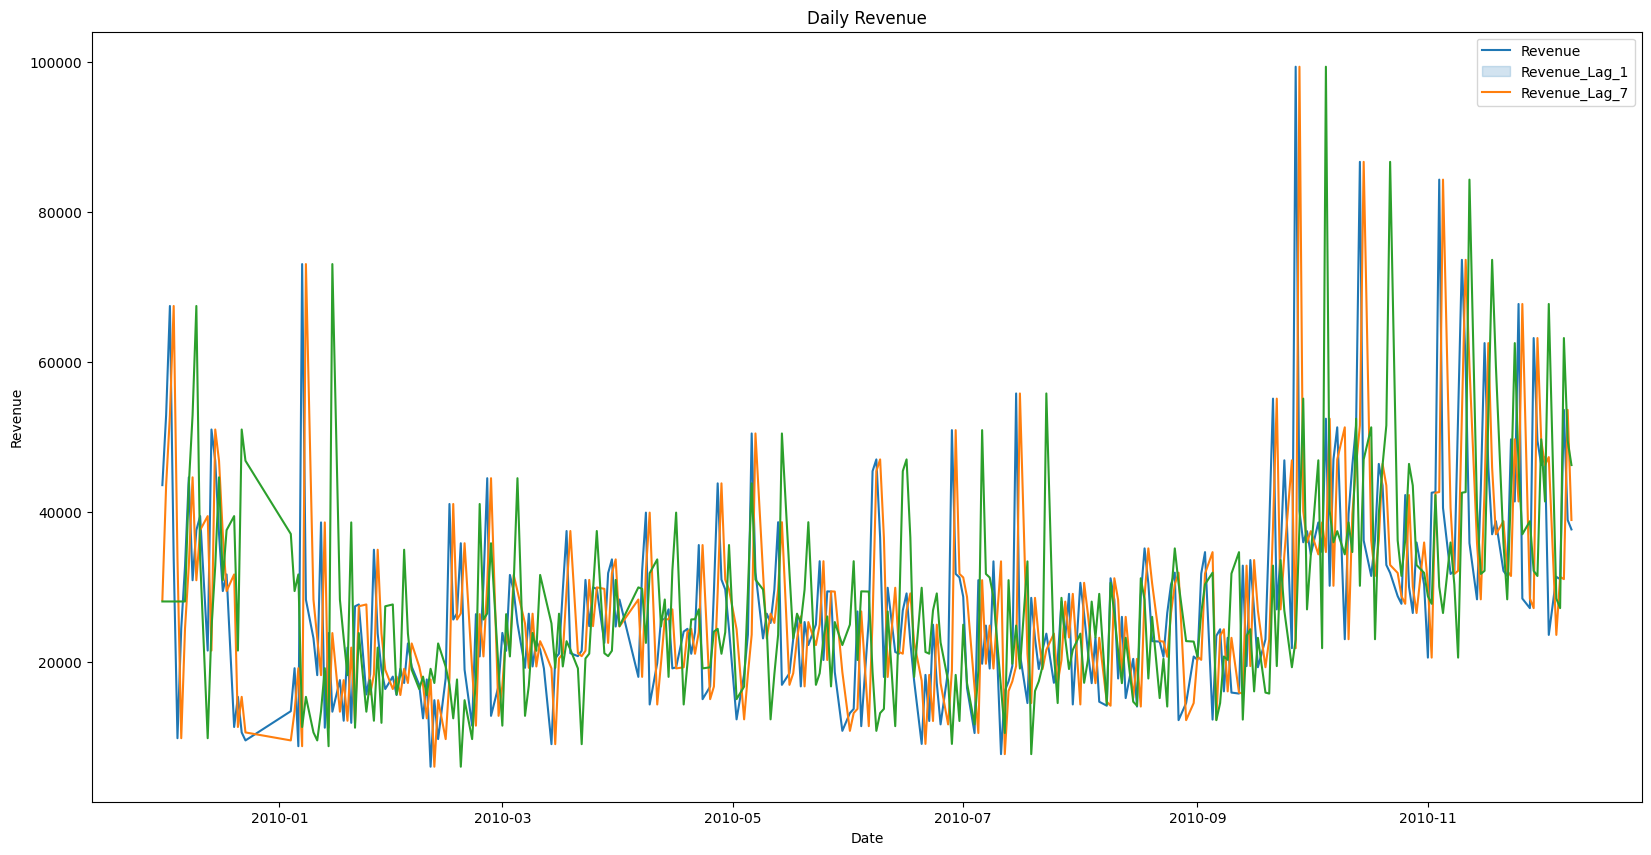

In [37]:
plt.figure(figsize=(20, 10))
sns.lineplot(x=df_revenue_['Date'], y=df_revenue_['Revenue'])
sns.lineplot(x=df_revenue_['Date'], y=df_revenue_['Revenue_Lag_1'])
sns.lineplot(x=df_revenue_['Date'], y=df_revenue_['Revenue_Lag_7'])
plt.legend(['Revenue', 'Revenue_Lag_1', 'Revenue_Lag_7'])
plt.title("Daily Revenue")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.show()

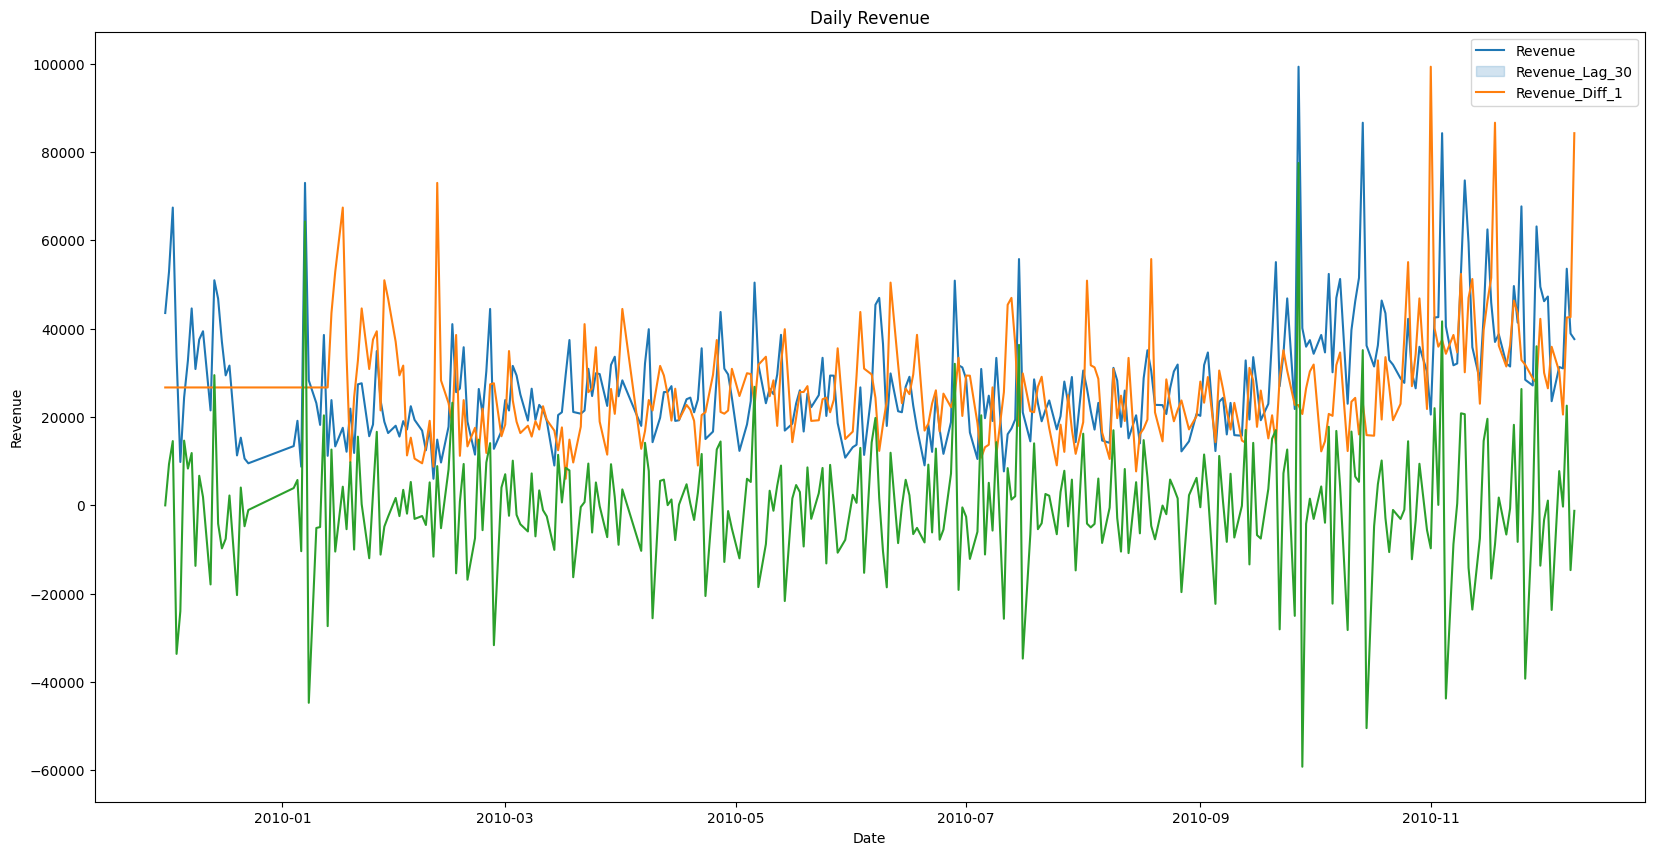

In [38]:
plt.figure(figsize=(20, 10))
sns.lineplot(x=df_revenue_['Date'], y=df_revenue_['Revenue'])
sns.lineplot(x=df_revenue_['Date'], y=df_revenue_['Revenue_Lag_30'])
sns.lineplot(x=df_revenue_['Date'], y=df_revenue_['Revenue_Diff_1'])
plt.legend(["Revenue", 'Revenue_Lag_30', 'Revenue_Diff_1'])
plt.title("Daily Revenue")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.show()

In [39]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Function to plot ACF and PACF
def plot_correlations(df, column, lags=20):
    """
    Plot ACF and PACF for the given time series column.
    
    Args:
        df (pd.DataFrame): Input DataFrame containing the time series data.
        column (str): Name of the column to analyze.
        lags (int): Number of lags to include in the plots.
    """
    # Ensure the column is stationary
    ts = df[column].diff().dropna()

    # Plot ACF and PACF
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    plot_acf(ts, ax=axes[0], lags=lags, title='Autocorrelation (ACF)')
    plot_pacf(ts, ax=axes[1], lags=lags, title='Partial Autocorrelation (PACF)')

    plt.tight_layout()
    plt.show()

In [40]:
plot_correlations(df_revenue_, 'Revenue', lags=30)

In [41]:
from feature_engineering import SpikeNormalizer

sn = SpikeNormalizer(df=df_revenue_, column="Revenue")

In [42]:
# Apply all normalization methods
sn.normalize_all(lower_quantile=0.05, upper_quantile=0.95, smooth_window=7)

All normalization methods applied.


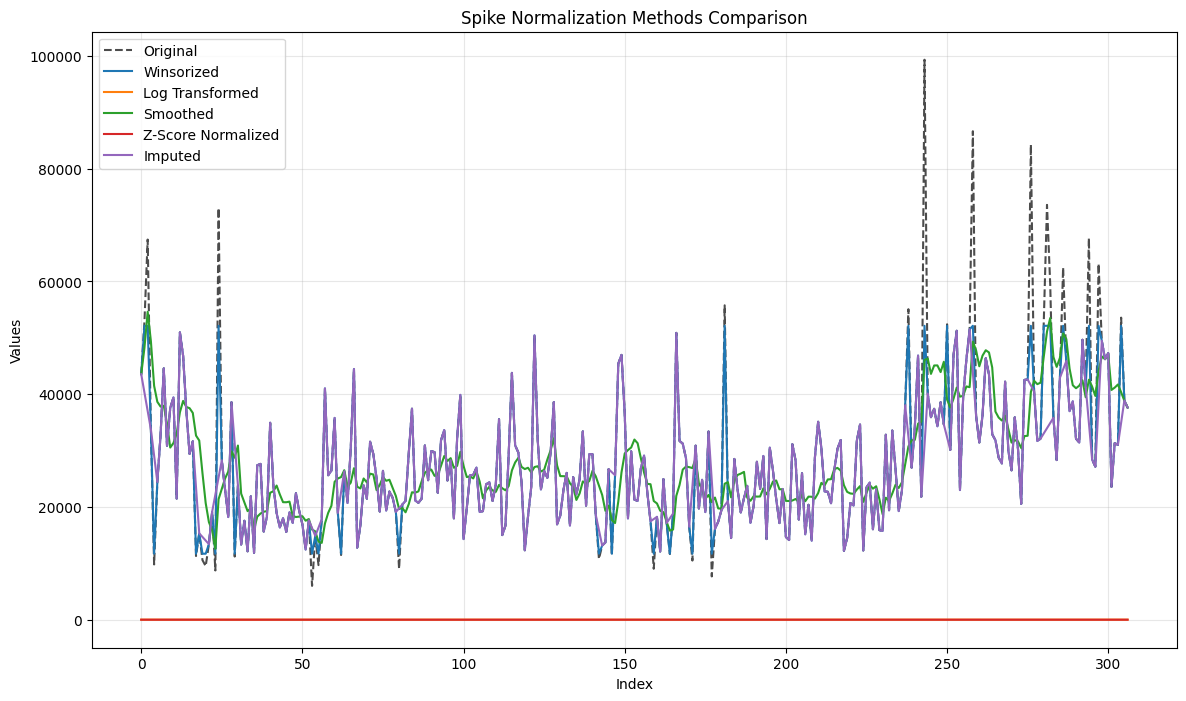

In [43]:
# Visualize the results
sn.visualize_results()

Correlations for Winsorized


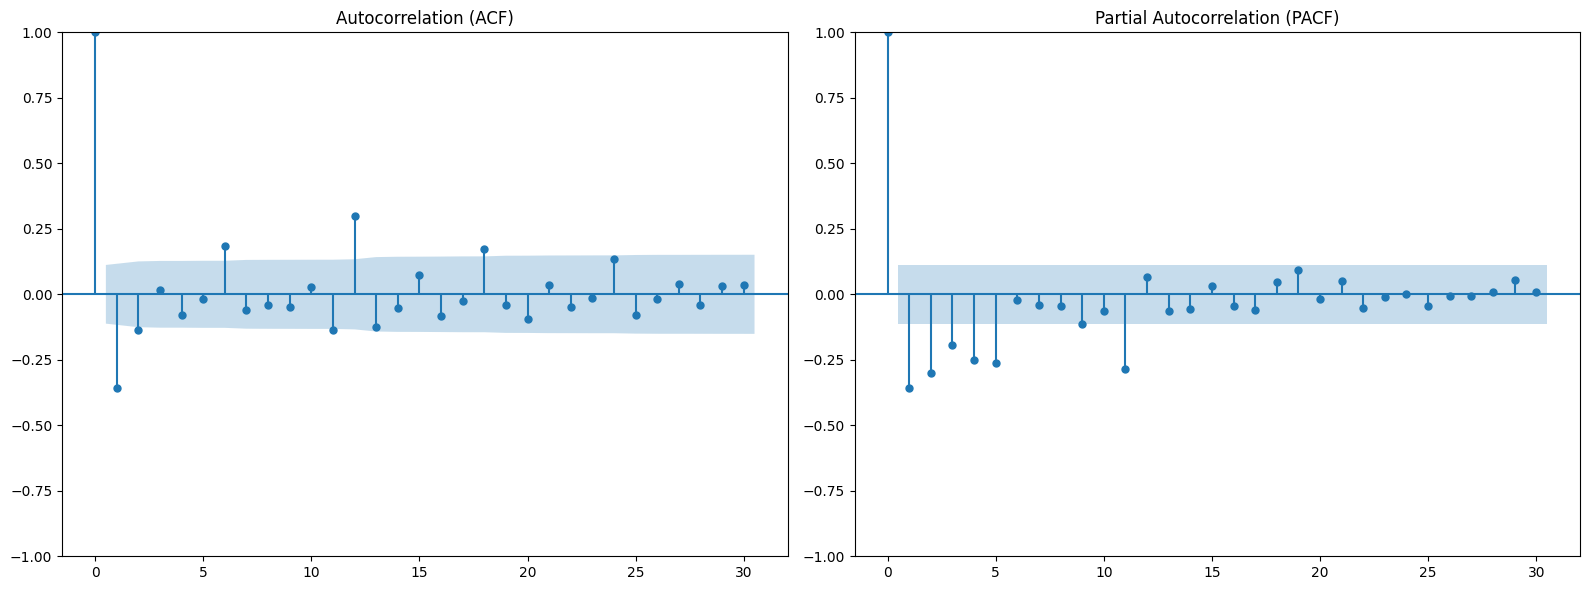

Correlations for LogTransformed


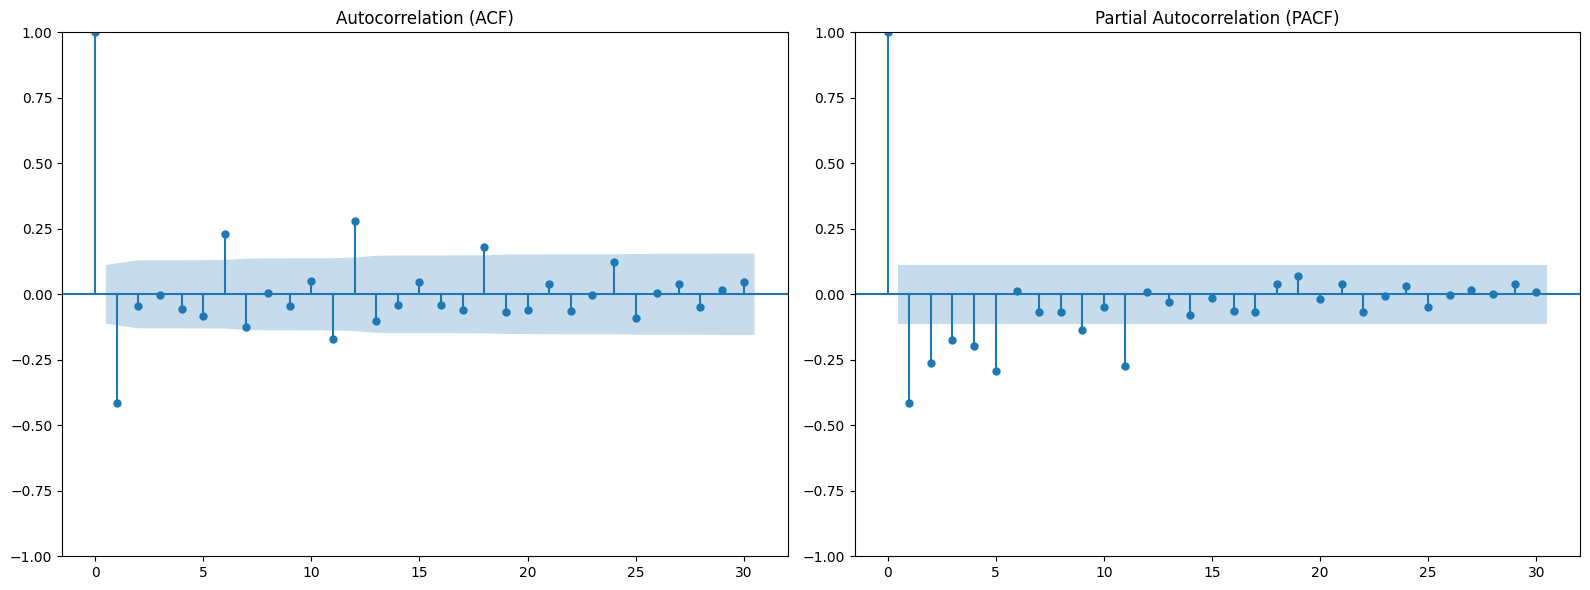

Correlations for Smoothed


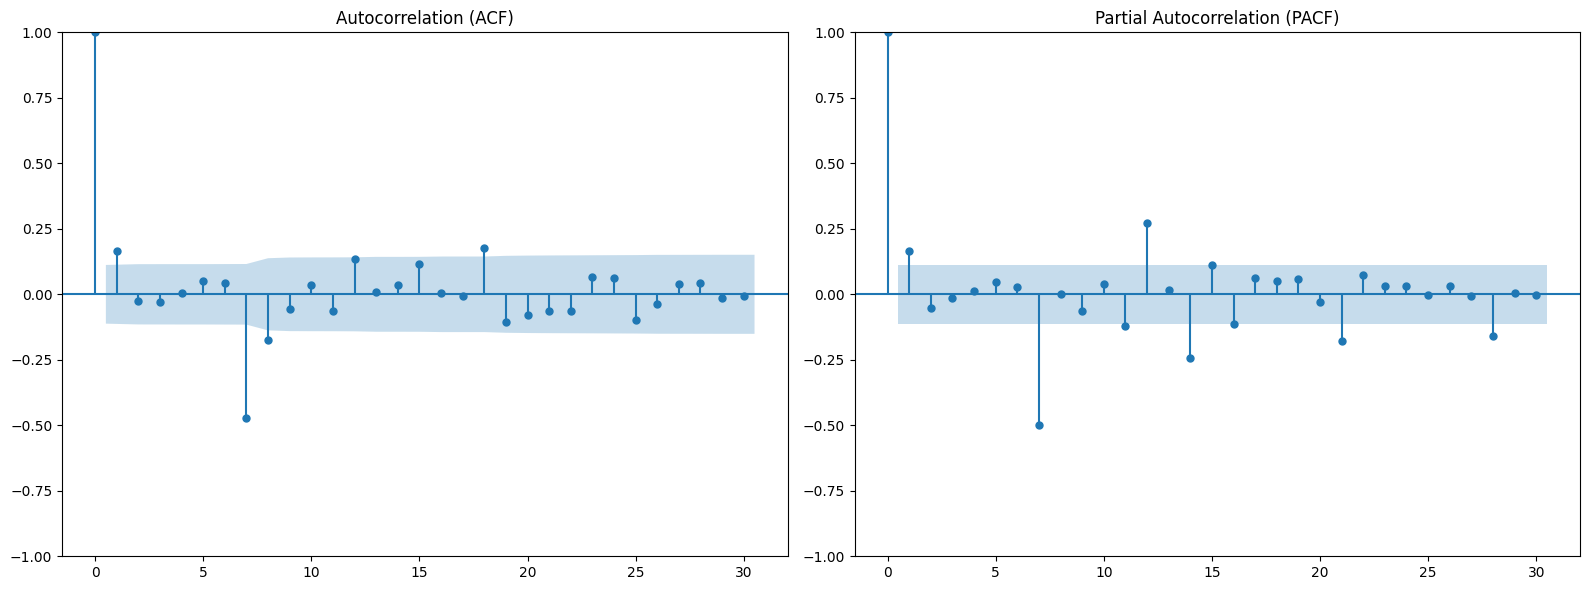

Correlations for ZScore


Correlations for Imputed


In [44]:
columns = ["Winsorized", "LogTransformed", "Smoothed", "ZScore", "Imputed"]

for column in columns:
    print(f"Correlations for {column}")
    plot_correlations(sn.df, column, lags=30)

In [45]:
df_revenue_["Revenue_Smoothed"] = sn.df["Smoothed"]

In [46]:
df_revenue_.head(10)

Date   Revenue  Outlier  DayOfWeek  Month  Year  IsWeekend  \
0 2009-12-01  43543.69    False          1     12  2009          0   
1 2009-12-02  52887.99    False          2     12  2009          0   
2 2009-12-03  67429.08     True          3     12  2009          0   
3 2009-12-04  33771.35    False          4     12  2009          0   
4 2009-12-05   9803.05    False          5     12  2009          1   
5 2009-12-06  24442.72    False          6     12  2009          1   
6 2009-12-07  32753.63    False          0     12  2009          0   
7 2009-12-08  44583.69    False          1     12  2009          0   
8 2009-12-09  30861.60    False          2     12  2009          0   
9 2009-12-10  37543.34    False          3     12  2009          0   

   Revenue_RollingMean_7  Revenue_RollingStd_7  Revenue_Lag_1  Revenue_Lag_7  \
0           27982.447683           9776.592086   28221.387072    28033.59628   
1           27982.447683           9776.592086   43543.690000    28033.59628   
2           27982.447683           9776.592086   52887.990000    28033.59628   
3           27982.447683           9776.592086   67429.080000    28033.59628   
4           27982.447683           9776.592086   33771.350000    28033.59628   
5           27982.447683           9776.592086    9803.050000    28033.59628   
6           37804.501429          18896.479682   24442.720000    28033.59628   
7           37953.072857          18953.127552   32753.630000    43543.69000   
8           34806.445714          17857.093197   44583.690000    52887.99000   
9           30537.054286          11022.061703   30861.600000    67429.08000   

   Revenue_Lag_30  Revenue_Diff_1  Revenue_Smoothed  
0    26685.858996      -19.296699      43543.690000  
1    26685.858996     9344.300000      48215.840000  
2    26685.858996    14541.090000      54620.253333  
3    26685.858996   -33657.730000      49408.027500  
4    26685.858996   -23968.300000      41487.032000  
5    26685.858996    14639.670000      38646.313333  
6    26685.858996     8310.910000      37804.501429  
7    26685.858996    11830.060000      37953.072857  
8    26685.858996   -13722.090000      34806.445714  
9    26685.858996     6681.740000      30537.054286

In [79]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_revenue_scaled = scaler.fit_transform(df_revenue_[["Revenue"]])
df_revenue_["Revenue_Scaled"] = df_revenue_scaled
df_revenue_.head(10)

Date   Revenue  Outlier  DayOfWeek  Month  Year  IsWeekend  \
0 2009-12-01  43543.69    False          1     12  2009          0   
1 2009-12-02  52887.99    False          2     12  2009          0   
2 2009-12-03  67429.08     True          3     12  2009          0   
3 2009-12-04  33771.35    False          4     12  2009          0   
4 2009-12-05   9803.05    False          5     12  2009          1   
5 2009-12-06  24442.72    False          6     12  2009          1   
6 2009-12-07  32753.63    False          0     12  2009          0   
7 2009-12-08  44583.69    False          1     12  2009          0   
8 2009-12-09  30861.60    False          2     12  2009          0   
9 2009-12-10  37543.34    False          3     12  2009          0   

   Revenue_RollingMean_7  Revenue_RollingStd_7  Revenue_Lag_1  Revenue_Lag_7  \
0           8.477169e-16              0.000000  -2.690316e-16       0.000000   
1           8.477169e-16              0.000000   1.133097e+00       0.000000   
2           8.477169e-16              0.000000   1.824116e+00       0.000000   
3           8.477169e-16              0.000000   2.899442e+00       0.000000   
4           8.477169e-16              0.000000   4.104245e-01       0.000000   
5           8.477169e-16              0.000000  -1.362052e+00       0.000000   
6           1.144361e+00              1.797706  -2.794357e-01       0.000000   
7           1.161671e+00              1.808873   3.351632e-01       1.159126   
8           7.950594e-01              1.592823   1.210006e+00       1.857460   
9           2.976355e-01              0.245506   1.952460e-01       2.944169   

   Revenue_Lag_30  Revenue_Diff_1  Revenue_Smoothed  Revenue_Scaled  \
0             0.0    2.421288e-19      43543.690000        1.129940   
1             0.0    6.381590e-01      48215.840000        1.820415   
2             0.0    9.923369e-01      54620.253333        2.894896   
3             0.0   -2.292567e+00      49408.027500        0.407835   
4             0.0   -1.632201e+00      41487.032000       -1.363247   
5             0.0    9.990554e-01      38646.313333       -0.281483   
6             0.0    5.677302e-01      37804.501429        0.332633   
7             0.0    8.075715e-01      37953.072857        1.206788   
8             0.0   -9.338891e-01      34806.445714        0.192826   
9             0.0    4.566971e-01      30537.054286        0.686558   

   Dayofweek_Cos  Dayofweek_Sin  Month_Cos  Month_Sin  
0       0.793875       0.953803   1.392612   0.024662  
1      -0.332185       1.257608   1.392612   0.024662  
2      -1.235216       0.406365   1.392612   0.024662  
3      -1.235216      -0.958923   1.392612   0.024662  
4      -0.332185      -1.810166   1.392612   0.024662  
5       0.793875      -1.506361   1.392612   0.024662  
6       1.295019      -0.276279   1.392612   0.024662  
7       0.793875       0.953803   1.392612   0.024662  
8      -0.332185       1.257608   1.392612   0.024662  
9      -1.235216       0.406365   1.392612   0.024662

In [48]:
# Standardize the data
df_revenue_scaled = scaler.fit_transform(df_revenue_[["Revenue_RollingMean_7", "Revenue_RollingStd_7", "Revenue_Lag_1", "Revenue_Lag_7", "Revenue_Lag_30", "Revenue_Diff_1"]])
df_revenue_[["Revenue_RollingMean_7", "Revenue_RollingStd_7", "Revenue_Lag_1", "Revenue_Lag_7", "Revenue_Lag_30", "Revenue_Diff_1"]] = df_revenue_scaled
df_revenue_.head(10)

Date   Revenue  Outlier  DayOfWeek  Month  Year  IsWeekend  \
0 2009-12-01  43543.69    False          1     12  2009          0   
1 2009-12-02  52887.99    False          2     12  2009          0   
2 2009-12-03  67429.08     True          3     12  2009          0   
3 2009-12-04  33771.35    False          4     12  2009          0   
4 2009-12-05   9803.05    False          5     12  2009          1   
5 2009-12-06  24442.72    False          6     12  2009          1   
6 2009-12-07  32753.63    False          0     12  2009          0   
7 2009-12-08  44583.69    False          1     12  2009          0   
8 2009-12-09  30861.60    False          2     12  2009          0   
9 2009-12-10  37543.34    False          3     12  2009          0   

   Revenue_RollingMean_7  Revenue_RollingStd_7  Revenue_Lag_1  Revenue_Lag_7  \
0           8.477169e-16              0.000000  -2.690316e-16       0.000000   
1           8.477169e-16              0.000000   1.133097e+00       0.000000   
2           8.477169e-16              0.000000   1.824116e+00       0.000000   
3           8.477169e-16              0.000000   2.899442e+00       0.000000   
4           8.477169e-16              0.000000   4.104245e-01       0.000000   
5           8.477169e-16              0.000000  -1.362052e+00       0.000000   
6           1.144361e+00              1.797706  -2.794357e-01       0.000000   
7           1.161671e+00              1.808873   3.351632e-01       1.159126   
8           7.950594e-01              1.592823   1.210006e+00       1.857460   
9           2.976355e-01              0.245506   1.952460e-01       2.944169   

   Revenue_Lag_30  Revenue_Diff_1  Revenue_Smoothed  Revenue_Scaled  
0             0.0    2.421288e-19      43543.690000        1.129940  
1             0.0    6.381590e-01      48215.840000        1.820415  
2             0.0    9.923369e-01      54620.253333        2.894896  
3             0.0   -2.292567e+00      49408.027500        0.407835  
4             0.0   -1.632201e+00      41487.032000       -1.363247  
5             0.0    9.990554e-01      38646.313333       -0.281483  
6             0.0    5.677302e-01      37804.501429        0.332633  
7             0.0    8.075715e-01      37953.072857        1.206788  
8             0.0   -9.338891e-01      34806.445714        0.192826  
9             0.0    4.566971e-01      30537.054286        0.686558

In [49]:
# Standardize the cyclic features
df_revenue_["Dayofweek_Cos"] = np.cos(2 * np.pi * df_revenue_["DayOfWeek"] / 7)
df_revenue_["Dayofweek_Sin"] = np.sin(2 * np.pi * df_revenue_["DayOfWeek"] / 7)
df_revenue_["Month_Cos"] = np.cos(2 * np.pi * df_revenue_["Month"] / 12)
df_revenue_["Month_Sin"] = np.sin(2 * np.pi * df_revenue_["Month"] / 12)

df_revenue_scaled = scaler.fit_transform(df_revenue_[["Dayofweek_Cos", "Dayofweek_Sin", "Month_Cos", "Month_Sin"]])
df_revenue_[["Dayofweek_Cos", "Dayofweek_Sin", "Month_Cos", "Month_Sin"]] = df_revenue_scaled

df_revenue_.head(10)

Date   Revenue  Outlier  DayOfWeek  Month  Year  IsWeekend  \
0 2009-12-01  43543.69    False          1     12  2009          0   
1 2009-12-02  52887.99    False          2     12  2009          0   
2 2009-12-03  67429.08     True          3     12  2009          0   
3 2009-12-04  33771.35    False          4     12  2009          0   
4 2009-12-05   9803.05    False          5     12  2009          1   
5 2009-12-06  24442.72    False          6     12  2009          1   
6 2009-12-07  32753.63    False          0     12  2009          0   
7 2009-12-08  44583.69    False          1     12  2009          0   
8 2009-12-09  30861.60    False          2     12  2009          0   
9 2009-12-10  37543.34    False          3     12  2009          0   

   Revenue_RollingMean_7  Revenue_RollingStd_7  Revenue_Lag_1  Revenue_Lag_7  \
0           8.477169e-16              0.000000  -2.690316e-16       0.000000   
1           8.477169e-16              0.000000   1.133097e+00       0.000000   
2           8.477169e-16              0.000000   1.824116e+00       0.000000   
3           8.477169e-16              0.000000   2.899442e+00       0.000000   
4           8.477169e-16              0.000000   4.104245e-01       0.000000   
5           8.477169e-16              0.000000  -1.362052e+00       0.000000   
6           1.144361e+00              1.797706  -2.794357e-01       0.000000   
7           1.161671e+00              1.808873   3.351632e-01       1.159126   
8           7.950594e-01              1.592823   1.210006e+00       1.857460   
9           2.976355e-01              0.245506   1.952460e-01       2.944169   

   Revenue_Lag_30  Revenue_Diff_1  Revenue_Smoothed  Revenue_Scaled  \
0             0.0    2.421288e-19      43543.690000        1.129940   
1             0.0    6.381590e-01      48215.840000        1.820415   
2             0.0    9.923369e-01      54620.253333        2.894896   
3             0.0   -2.292567e+00      49408.027500        0.407835   
4             0.0   -1.632201e+00      41487.032000       -1.363247   
5             0.0    9.990554e-01      38646.313333       -0.281483   
6             0.0    5.677302e-01      37804.501429        0.332633   
7             0.0    8.075715e-01      37953.072857        1.206788   
8             0.0   -9.338891e-01      34806.445714        0.192826   
9             0.0    4.566971e-01      30537.054286        0.686558   

   Dayofweek_Cos  Dayofweek_Sin  Month_Cos  Month_Sin  
0       0.793875       0.953803   1.392612   0.024662  
1      -0.332185       1.257608   1.392612   0.024662  
2      -1.235216       0.406365   1.392612   0.024662  
3      -1.235216      -0.958923   1.392612   0.024662  
4      -0.332185      -1.810166   1.392612   0.024662  
5       0.793875      -1.506361   1.392612   0.024662  
6       1.295019      -0.276279   1.392612   0.024662  
7       0.793875       0.953803   1.392612   0.024662  
8      -0.332185       1.257608   1.392612   0.024662  
9      -1.235216       0.406365   1.392612   0.024662

# Train Test split

For this part we will finally split the dataset for the model, in this case we will use all the variables except for the year and date.

In [50]:
def split_data(df, train_ratio):
    split_index = int(len(df) * train_ratio)
    train_set = df.iloc[:split_index]
    test_set = df.iloc[split_index:]
    return train_set, test_set

In [51]:
train_set, test_set = split_data(df_revenue_.drop(["Date", "DayOfWeek",	"Month", "Year"], axis=1), 0.8)

In [52]:
train_data = train_set["Revenue"]
test_data = test_set["Revenue"]
exog_train = train_set.drop(["Revenue", "Revenue_Smoothed", "Revenue_Scaled"], axis=1)
exog_test = test_set.drop(["Revenue", "Revenue_Smoothed", "Revenue_Scaled"], axis=1)

In [53]:
#Encode Outlier column
exog_train["Outlier"] = exog_train["Outlier"].astype(int)
exog_test["Outlier"] = exog_test["Outlier"].astype(int)

exog_train.head(10)

Outlier  IsWeekend  Revenue_RollingMean_7  Revenue_RollingStd_7  \
0        0          0           8.477169e-16              0.000000   
1        0          0           8.477169e-16              0.000000   
2        1          0           8.477169e-16              0.000000   
3        0          0           8.477169e-16              0.000000   
4        0          1           8.477169e-16              0.000000   
5        0          1           8.477169e-16              0.000000   
6        0          0           1.144361e+00              1.797706   
7        0          0           1.161671e+00              1.808873   
8        0          0           7.950594e-01              1.592823   
9        0          0           2.976355e-01              0.245506   

   Revenue_Lag_1  Revenue_Lag_7  Revenue_Lag_30  Revenue_Diff_1  \
0  -2.690316e-16       0.000000             0.0    2.421288e-19   
1   1.133097e+00       0.000000             0.0    6.381590e-01   
2   1.824116e+00       0.000000             0.0    9.923369e-01   
3   2.899442e+00       0.000000             0.0   -2.292567e+00   
4   4.104245e-01       0.000000             0.0   -1.632201e+00   
5  -1.362052e+00       0.000000             0.0    9.990554e-01   
6  -2.794357e-01       0.000000             0.0    5.677302e-01   
7   3.351632e-01       1.159126             0.0    8.075715e-01   
8   1.210006e+00       1.857460             0.0   -9.338891e-01   
9   1.952460e-01       2.944169             0.0    4.566971e-01   

   Dayofweek_Cos  Dayofweek_Sin  Month_Cos  Month_Sin  
0       0.793875       0.953803   1.392612   0.024662  
1      -0.332185       1.257608   1.392612   0.024662  
2      -1.235216       0.406365   1.392612   0.024662  
3      -1.235216      -0.958923   1.392612   0.024662  
4      -0.332185      -1.810166   1.392612   0.024662  
5       0.793875      -1.506361   1.392612   0.024662  
6       1.295019      -0.276279   1.392612   0.024662  
7       0.793875       0.953803   1.392612   0.024662  
8      -0.332185       1.257608   1.392612   0.024662  
9      -1.235216       0.406365   1.392612   0.024662

# Model Training

In [54]:
from model import ARIMAModel

arima = ARIMAModel(np.array(train_data), np.array(test_data), np.array(exog_train), np.array(exog_test))
arima.train(order=(18, 1, 17))

/Users/johnpaulparedes/Documents/Ai_programming/sales_quantity_prediction/new_venv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/johnpaulparedes/Documents/Ai_programming/sales_quantity_prediction/new_venv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  245
Model:               ARIMA(18, 1, 17)   Log Likelihood               -4205.252
Date:                Fri, 27 Dec 2024   AIC                           8506.503
Time:                        12:55:14   BIC                           8674.367
Sample:                             0   HQIC                          8574.110
                                - 245                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1           561.3507     32.228     17.418      0.000     498.185     624.516
x2          -181.4162      7.343    -24.705      0.000    -195.809    -167.023
x3           645.0227     17.924     35.986      0.0

/Users/johnpaulparedes/Documents/Ai_programming/sales_quantity_prediction/new_venv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Mean Absolute Error: 10772606.467172062
Root Mean Squared Error: 12166964.489201736


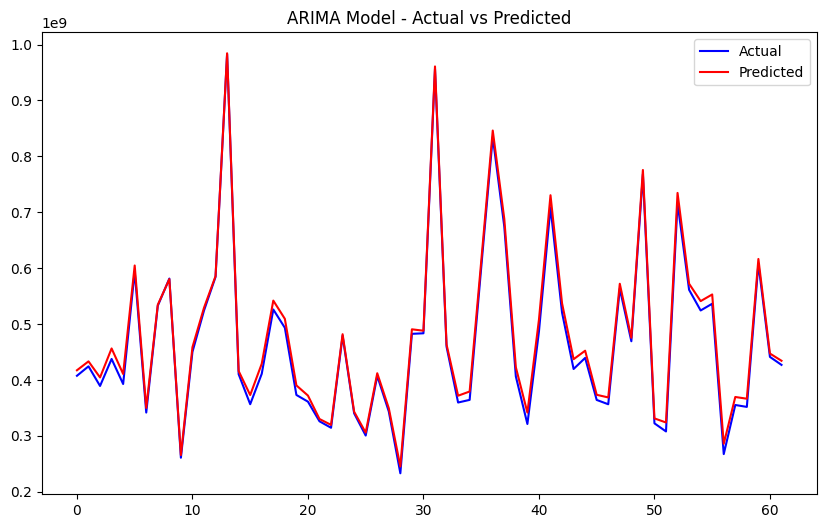

In [55]:
arima.evaluate()

In [56]:
arima.save_model("./models/arima_model.pkl")

Model saved as ./models/arima_model.pkl


## Model Fine-tunning

We will also train to Arima models more to see which one has the best metrics, in this case:

- Smothed Data
- Scaled Data

In [63]:
train_data_smothed = train_set["Revenue_Smoothed"]
test_data_smothed = test_set["Revenue_Smoothed"]

In [64]:
arima_smoothed = ARIMAModel(np.array(train_data_smothed), np.array(test_data_smothed), np.array(exog_train), np.array(exog_test))
arima_smoothed.train(order=(18, 1, 28))

/Users/johnpaulparedes/Documents/Ai_programming/sales_quantity_prediction/new_venv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/johnpaulparedes/Documents/Ai_programming/sales_quantity_prediction/new_venv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/johnpaulparedes/Documents/Ai_programming/sales_quantity_prediction/new_venv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  245
Model:               ARIMA(18, 1, 28)   Log Likelihood               -1909.035
Date:                Fri, 27 Dec 2024   AIC                           3936.070
Time:                        15:12:49   BIC                           4142.403
Sample:                             0   HQIC                          4019.169
                                - 245                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1          1911.4142    143.922     13.281      0.000    1629.333    2193.495
x2            92.6752     50.338      1.841      0.066      -5.985     191.335
x3          6987.1304    248.795     28.084      0.0

In [65]:
arima_smoothed.evaluate()

Mean Absolute Error: 10048980.943179907
Root Mean Squared Error: 11348545.875508752


In [60]:
# Arima model with scaled revenue
train_data_scaled = train_set["Revenue_Scaled"]
test_data_scaled = test_set["Revenue_Scaled"]

In [70]:
arima_scaled = ARIMAModel(np.array(train_data_scaled), np.array(test_data_scaled), np.array(exog_train), np.array(exog_test))
arima_scaled.train(order=(18, 1, 20))

/Users/johnpaulparedes/Documents/Ai_programming/sales_quantity_prediction/new_venv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/johnpaulparedes/Documents/Ai_programming/sales_quantity_prediction/new_venv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/johnpaulparedes/Documents/Ai_programming/sales_quantity_prediction/new_venv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  245
Model:               ARIMA(18, 1, 20)   Log Likelihood                 336.888
Date:                Fri, 27 Dec 2024   AIC                           -571.776
Time:                        15:18:23   BIC                           -393.420
Sample:                             0   HQIC                          -499.944
                                - 245                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0517      0.032      1.628      0.104      -0.011       0.114
x2            -0.0034      0.006     -0.526      0.599      -0.016       0.009
x3             0.1434      0.066      2.186      0.0

In [71]:
arima_scaled.evaluate()

Mean Absolute Error: 0.05765702992077504
Root Mean Squared Error: 0.06707121104688438


## Model Conclusions

After evaluating all models it looks like the model with the best forecasting is the last model with the help of scaling, the model is capable to forecast very accurated. 

# Model results

After successfully trained the model lets see how many sales we will have the following 62 days.

In [76]:
# Forecasting the values for the next 100 days
forecast = arima_scaled.fitted_model.forecast(steps=62, exog=exog_test)
forecast

array([ 0.63148199,  0.76363954,  0.55245524,  0.84773862,  0.56657383,
        1.79765069,  0.12872166,  1.38698812,  1.65909653, -0.35651673,
        0.89316418,  1.3164738 ,  1.70138495,  4.33018431,  0.63853315,
        0.3535709 ,  0.70051361,  1.44613718,  1.23141065,  0.43882997,
        0.32334688,  0.03542045, -0.05735779,  0.99604791,  0.08506256,
       -0.19444295,  0.4795176 ,  0.06367765, -0.63560781,  0.96772192,
        0.9500136 ,  4.038593  ,  0.85321888,  0.30295196,  0.35098413,
        1.89782528,  3.453552  ,  2.4603079 ,  0.70855419,  0.13350306,
        1.20208973,  2.68741727,  1.42553892,  0.77212899,  0.85318911,
        0.34243006,  0.31041814,  1.62766979,  0.98622323,  2.94113282,
        0.0317595 , -0.0164214 ,  2.65167926,  1.60619193,  1.4167536 ,
        1.50756093, -0.24717363,  0.30781172,  0.28430505,  1.89616843,
        0.77891662,  0.69646936])

In [80]:
# Unscaling the forecasted values
forecast_unscaled = scaler.inverse_transform(forecast.reshape(-1, 1))
forecast_unscaled

array([[36797.99506121],
       [38586.50134842],
       [35728.51523299],
       [39724.62562709],
       [35919.58408524],
       [52579.91556853],
       [29994.0708918 ],
       [47022.3627805 ],
       [50704.84308232],
       [23427.27335901],
       [40339.37597168],
       [46068.08290238],
       [51277.13812463],
       [86853.0391962 ],
       [36893.41940287],
       [33036.98639273],
       [37732.20942122],
       [47822.83516976],
       [44916.91159807],
       [34190.80898641],
       [32627.96054372],
       [28731.41278995],
       [27475.83225191],
       [41731.7155486 ],
       [29403.22622694],
       [25620.640007  ],
       [34741.44020997],
       [29113.82140141],
       [19650.29566313],
       [41348.3759715 ],
       [41108.72691538],
       [82906.89414367],
       [39798.79079705],
       [32351.95330171],
       [33001.97922567],
       [53935.59195589],
       [74989.45430689],
       [61547.74614537],
       [37841.02365559],
       [30058.77811428],


In [87]:
# Plotting the forecasted values of the revenue for the next 62 days
plt.figure(figsize=(20, 10))
sns.lineplot(x=df_revenue_["Date"].values[:62], y=forecast_unscaled.flatten(), label="Forecasted Revenue")
plt.title("Forecasted Revenue")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.legend()
plt.show()